In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 
from datetime import date

from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Reproducibility
SEED = 42
np.random.seed(SEED)

In [3]:
from datetime import date

symbol = "AAPL"                           # Stock ticker
start = "2016-01-01"
end = date.today().strftime("%Y-%m-%d")   # today's date in YYYY-MM-DD format

# Predict the next-day return
TARGET = "Target_Return_1d"

# Define test period (time-based split)
test_start_date = "2024-01-01"


In [4]:
df = yf.download(symbol, start=start, end=end)
df.head()


/var/folders/n8/k6s3cgwn5gv4p4x929qsxlkc0000gn/T/ipykernel_8865/631684720.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.753153,23.757663,22.997832,23.135368,270597600
2016-01-05,23.157911,23.865884,23.090272,23.843337,223164000
2016-01-06,22.704718,23.081252,22.517580,22.673152,273829600
2016-01-07,21.746471,22.576197,21.741963,22.249268,324377600
2016-01-08,21.861465,22.346224,21.816372,22.219962,283192000


Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


<Figure size 1200x600 with 0 Axes>

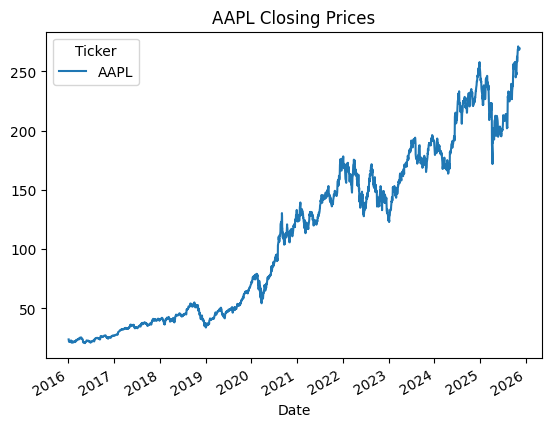

In [5]:
print(df.isna().sum())

plt.figure(figsize=(12, 6))
df['Close'].plot(title=f"{symbol} Closing Prices")
plt.show()

<Figure size 1000x300 with 0 Axes>

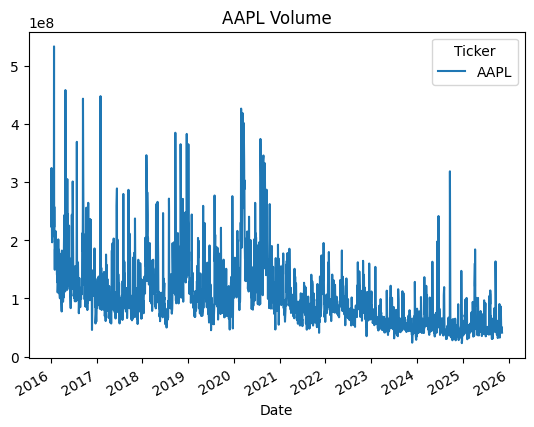

In [6]:
plt.figure(figsize=(10,3))
df["Volume"].plot(title=f"{symbol} Volume")
plt.show()